# Support Vector Machine

In [1]:
import numpy as np 


import matplotlib.pyplot as plt
%matplotlib inline 

from pylearn_ml191.svm import PrimalSVM

import warnings 
warnings.filterwarnings("ignore")

## 1. Data Generation

In [2]:
means = [[2, 2], [6, 2]]
cov = [[.3, 0.], [0., .3]]

# Numbers of sample of each class 
N = 100

X_1 = np.random.multivariate_normal(means[0], cov, N)
X_2 = np.random.multivariate_normal(means[1], cov, N)

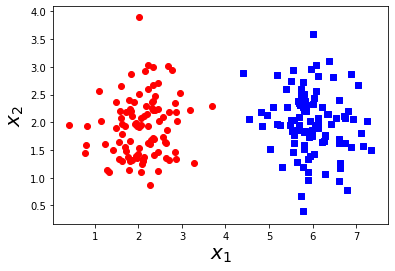

In [3]:
# Visualize generated data 
plt.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='o', alpha=1)
plt.scatter(X_2[:, 0], X_2[:, 1], c='blue', marker='s', alpha=1)
plt.xlabel("$x_1$", fontsize = 20)
plt.ylabel("$x_2$", fontsize = 20)
plt.show()

In [4]:
# N: num_samples, M - 1: features 
# X = (N, M-1)
X = np.concatenate((X_1, X_2), axis=0)
# target vector: t = (N, 1)
t = np.concatenate((-np.ones((N, 1)), np.ones((N,1))), axis=0)

print(X.shape)
print(t.shape)

(200, 2)
(200, 1)


## 2. Primal Problem in SVM 

### 2.1 Tìm nghiệm bằng thư viện CVXOPT

In [5]:
primal_model = PrimalSVM()
w, b = primal_model.fit(X, t)
primal_support_vectors = primal_model.get_support_vectors(X)

### 2.2 Tìm nghiệm bằng thư viện SVC trong sklearn

In [6]:
# Import libraries
from sklearn.svm import SVC 

svc = SVC(kernel="linear", C=1e10)
svc.fit(X, t)

# Get w, b solved by SVC model in sklearn 
w_l = svc.coef_
b_l = svc.intercept_

In [7]:
# SO SÁNH NGHIỆM BẰNG CÔNG THỨC VÀ NGHIỆM ĐẠT ĐƯỢC BẰNG CVXOPT
print("--------------NGHIỆM BẰNG THƯ VIỆN SVC -------------------")
print("Support vectors: ")
print(svc.support_vectors_)
print("w:", w_l)
print("b:", b_l)
print("----------------------------------------------------------")
print("----------  NGHIỆM BẰNG CÔNG THỨC SỬ DỤNG CVXOPT ---------")
print("Support vectors: ")
print(primal_support_vectors)
print("w:", w)
print("b:", b)
print("----------------------------------------------------------")

--------------NGHIỆM BẰNG THƯ VIỆN SVC -------------------
Support vectors: 
[[3.6859941  2.28541072]
 [4.40924276 2.89596806]
 [4.54675451 2.06217999]]
w: [[2.42765673 0.40151684]]
b: [-10.86627654]
----------------------------------------------------------
----------  NGHIỆM BẰNG CÔNG THỨC SỬ DỤNG CVXOPT ---------
Support vectors: 
[[3.6859941  2.28541072]
 [4.40924276 2.89596806]
 [4.54675451 2.06217999]]
w: [[2.42734873 0.40032826]]
b: [-10.86210764]
----------------------------------------------------------


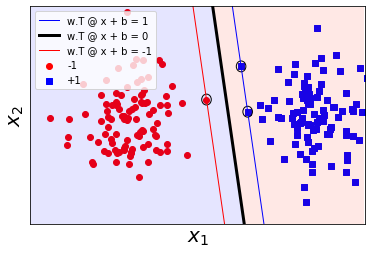

In [8]:
######## Visualize results in 2-D Dimensions #########
# Some settings 
step_size = 0.025
x_min = 0
x_max = 7
y_min = 0
y_max = 4

x_1 = np.arange(x_min, x_max, step_size)
x_2 = np.arange(y_min, y_max, step_size)

xx, yy = np.meshgrid(x_1, x_2)

xx1 = xx.ravel().reshape(xx.size, 1)
yy1 = yy.ravel().reshape(yy.size, 1)

X_use = np.concatenate((xx1, yy1), axis=1)

z = primal_model.predict(X_use)
z = np.reshape(z, xx.shape)
S = primal_model.get_support_vectors(X)

fig, ax = plt.subplots()
plt.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='o', alpha=1, label= "-1")
plt.scatter(X_2[:, 0], X_2[:, 1], c='blue', marker='s', alpha=1, label= "+1")
cs = plt.contourf(xx, yy, z, 200, cmap='jet', alpha = .1, levels=2)

# Plot decision boundary and margin lines 
w1 = w[0][0]
w2 = w[0][1]

# w1*x1 + w2*x2 + b = 1 ---> x2 = (1 - b - w1 * x1) / w2    
y_pos_1 = (1 - b - w1 * x_1) / w2 

# w1*x1 + w2*x2 + b = -1 ---> x2 = (-1 - b - w1 * x1) / w2
y_neg_1 = (- 1 - b - w1 * x_1) / w2 

# w1*x1 + w2*x2 + b = 0 ---> x2 = (-b - w1 * x1) / w2
decision_bound =  (-b - w1 * x_1) / w2 

plt.plot(x_1, y_pos_1, c='blue', linewidth=1, label="w.T @ x + b = 1")
plt.plot(x_1, decision_bound, c='black', linewidth=3, label="w.T @ x + b = 0")
plt.plot(x_1, y_neg_1, c='red', linewidth=1, label="w.T @ x + b = -1")

proxy = [plt.Rectangle((0,0), 1, 1, fc = pc.get_facecolor()[0]) 
    for pc in cs.collections]

# Circling the points, which are support vectors
for m in S:
    circle = plt.Circle(m, 0.1, color='k', fill = False)
    ax.add_artist(circle)
        
plt.legend()
plt.xticks(())
plt.yticks(())
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("$x_1$", fontsize = 20)
plt.ylabel("$x_2$", fontsize = 20)
plt.show()